In [34]:
from pvlib.irradiance import get_extra_radiation
import pandas as pd

In [47]:
df = pd.read_csv('w5e5_2019.csv', parse_dates=["time"])
df = df.set_index('time')
df.index.tz_localize(tz='Asia/Kolkata')
df

,prcp,temp,tempmax,tempmin,hurs,rsds,gradient
time,,,,,,,
2019-01-01,0.000000,-12.110077,-6.558746,-22.439453,73.053024,122.319420,-0.005550
2019-01-02,0.000000,-7.526947,-2.236450,-13.214386,63.677970,124.603806,-0.005550
2019-01-03,0.000000,-11.527924,-6.144867,-18.015290,69.005905,146.436450,-0.005550
2019-01-04,11.636147,-11.023376,-7.419708,-18.943344,69.180740,136.729640,-0.005550
2019-01-05,13.324922,-6.609131,-1.294464,-10.494904,64.278840,122.345150,-0.005550
...,...,...,...,...,...,...,...
2019-12-27,0.000000,-14.576599,-8.352722,-21.032806,48.389008,165.758440,-0.005502
2019-12-28,0.000000,-15.186493,-5.972748,-21.376862,51.339380,166.061900,-0.005502
2019-12-29,0.000000,-15.110840,-5.609283,-22.236115,52.923603,164.341310,-0.005502


2019-12-31T00:00:00.000000000


2019-01-01    177.502409
2019-01-02    178.157110
2019-01-03    178.869610
2019-01-04    179.639537
2019-01-05    180.466472
                 ...    
2019-12-27    175.023127
2019-12-28    175.369946
2019-12-29    175.775664
2019-12-30    176.240201
2019-12-31      0.000000
Freq: D, Name: ghi, Length: 365, dtype: float64

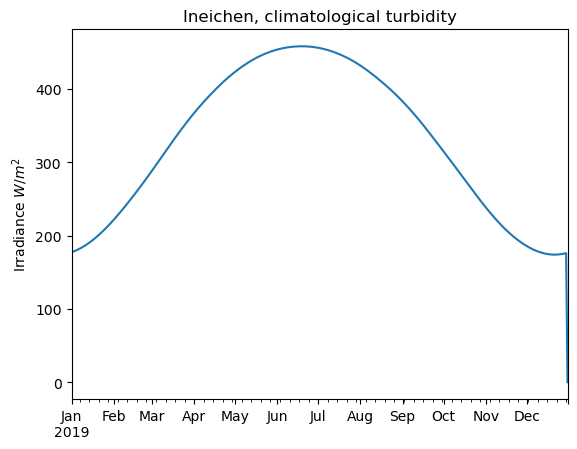

In [59]:
import matplotlib.pyplot as plt
import pandas as pd
import pvlib
from pvlib import clearsky, atmosphere, solarposition
from pvlib.location import Location

tus = Location(34.216638,77.606949, 'Asia/Kolkata', 4009, 'Gangles')
print(df.index.values[-1])

times = pd.date_range(start=df.index.values[0], end=df.index.values[-1], freq='60min', tz=tus.tz)

cs = tus.get_clearsky(times)['ghi']  # ineichen with climatology table by default
cs = cs.tz_localize(None)

# Resample and aggregate results by week
cs = cs.resample('D').sum()/24
cs.plot();

plt.ylabel('Irradiance $W/m^2$');

plt.title('Ineichen, climatological turbidity');

cs

In [61]:
df['ghi'] = cs
df

,prcp,temp,tempmax,tempmin,hurs,rsds,gradient,ghi
time,,,,,,,,
2019-01-01,0.000000,-12.110077,-6.558746,-22.439453,73.053024,122.319420,-0.005550,177.502409
2019-01-02,0.000000,-7.526947,-2.236450,-13.214386,63.677970,124.603806,-0.005550,178.157110
2019-01-03,0.000000,-11.527924,-6.144867,-18.015290,69.005905,146.436450,-0.005550,178.869610
2019-01-04,11.636147,-11.023376,-7.419708,-18.943344,69.180740,136.729640,-0.005550,179.639537
2019-01-05,13.324922,-6.609131,-1.294464,-10.494904,64.278840,122.345150,-0.005550,180.466472
...,...,...,...,...,...,...,...,...
2019-12-27,0.000000,-14.576599,-8.352722,-21.032806,48.389008,165.758440,-0.005502,175.023127
2019-12-28,0.000000,-15.186493,-5.972748,-21.376862,51.339380,166.061900,-0.005502,175.369946
2019-12-29,0.000000,-15.110840,-5.609283,-22.236115,52.923603,164.341310,-0.005502,175.775664


In [63]:
df['etp'] = 0.0023 * (df.temp + 17.78) * df.ghi * (df.tempmax - df.tempmin)**0.5 
# Althoff, D.; Santos, R.A.d.; Bazame, H.C.; Cunha, F.F.d.; Filgueiras, R. Improvement of Hargreaves–Samani Reference Evapotranspiration Estimates with Local Calibration. Water 2019, 11, 2272. https://doi.org/10.3390/w11112272

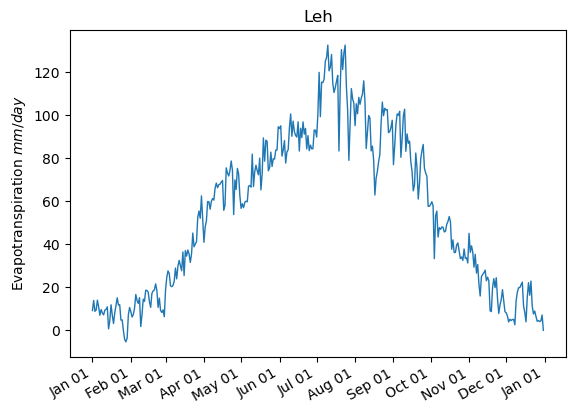

In [75]:
import matplotlib.dates as mdates
fig, ax = plt.subplots()
y1 = df.etp
ax.plot(
        y1,
        linewidth=1
    )
ax.set_ylabel('Evapotranspiration $mm/day$');
ax.set_title('Leh');
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter("%b %d"))
fig.autofmt_xdate()
plt.savefig(
        "../figs/Leh_evapotranspiration.png",
        bbox_inches="tight",
        dpi=300,
)